In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

csv_files = glob.glob('results/*.csv')
colors = [
    'red', 'purple', 'orange', 'blue', 'green', 'cyan', 'magenta', 
    'yellow', 'black', 'pink', 'brown', 'gray', 'olive', 'lime', 
    'indigo', 'maroon', 'navy', 'teal', 'violet', 'gold', 'coral', 
    'turquoise', 'salmon', 'plum', 'orchid', 'crimson', 'khaki', 
    'lavender', 'sienna', 'tan']

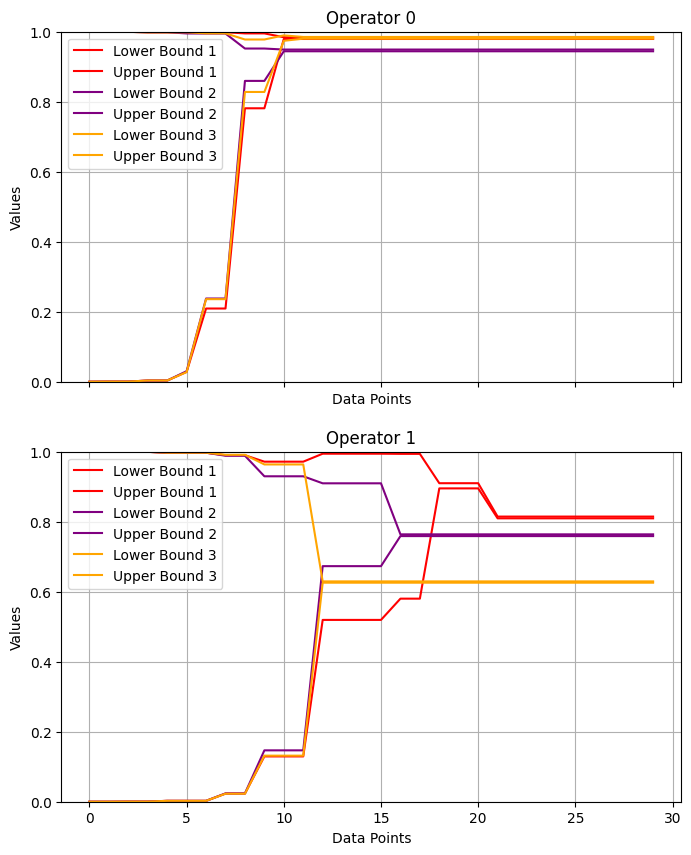

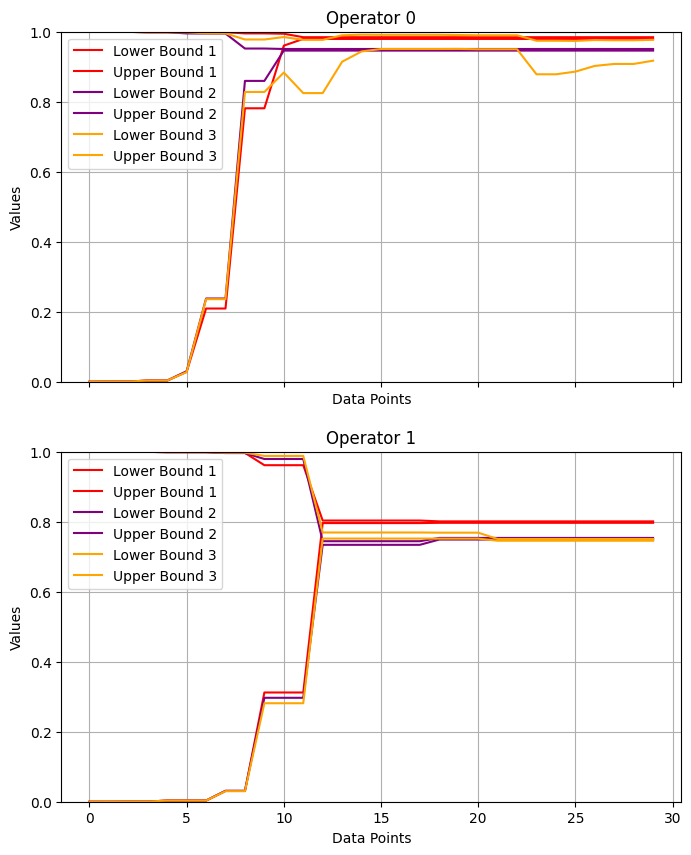

In [26]:

for file_index, csv_file in enumerate(csv_files):
    # Step 2: Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)

    # Step 2: Extract data for plotting
    operators = int(df['num_operators'].iloc[0]) # Assuming you want to plot for operators 0, 1, and 2
    # colors = colors[:operators]  # Colors for different operators

    # Create subplots for each operator
    fig, axs = plt.subplots(operators, 1, figsize=(8, 5*operators), sharex=True)

    # Plot each operator's data in separate subplots
    for operator in range(operators):
        lower_bound_1_col = f'{operator}_lower_bound_1'
        upper_bound_1_col = f'{operator}_upper_bound_1'
        lower_bound_2_col = f'{operator}_lower_bound_2'
        upper_bound_2_col = f'{operator}_upper_bound_2'
        lower_bound_3_col = f'{operator}_lower_bound_3'
        upper_bound_3_col = f'{operator}_upper_bound_3'

        lower_bound_1_data = df[lower_bound_1_col]
        upper_bound_1_data = df[upper_bound_1_col]
        lower_bound_2_data = df[lower_bound_2_col]
        upper_bound_2_data = df[upper_bound_2_col]
        lower_bound_3_data = df[lower_bound_3_col]
        upper_bound_3_data = df[upper_bound_3_col]

        # Plot lower and upper bounds
        axs[operator].plot(lower_bound_1_data, label=f'Lower Bound 1', color=colors[0], linestyle='-')
        axs[operator].plot(upper_bound_1_data, label=f'Upper Bound 1', color=colors[0], linestyle='-')
        axs[operator].plot(lower_bound_2_data, label=f'Lower Bound 2', color=colors[1], linestyle='-')
        axs[operator].plot(upper_bound_2_data, label=f'Upper Bound 2', color=colors[1], linestyle='-')
        axs[operator].plot(lower_bound_3_data, label=f'Lower Bound 3', color=colors[2], linestyle='-')
        axs[operator].plot(upper_bound_3_data, label=f'Upper Bound 3', color=colors[2], linestyle='-')

        # Customize subplot
        axs[operator].set_title(f'Operator {operator}')
        axs[operator].set_xlabel('Data Points')
        axs[operator].set_ylabel('Values')
        axs[operator].legend()
        axs[operator].grid(True)
        axs[operator].set_ylim(0, 1)  # Set y-axis limits to [0, 1]
        
        # Save the figure
        output_filename = f'{csv_file.split("\\")[-1]}.png'

In [27]:
for file_index, csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file)

    assigned_failures = []
    total_reward = []
    failure_duration = []

    for operator in range(operators):
        assigned_failures.append(df[f'{operator}_assigned_failures'].iloc[-1])

        total_reward.append(df[f'{operator}_total_reward'].sum())

        rows_assigned = df[df['assigned_to'] == operator]
        failure_duration.append(rows_assigned['duration'].sum())

    print('Assigned failures:', assigned_failures)
    print('Total reward:', np.round(total_reward, 2))
    print('Failure duration:', failure_duration)
    print("\n")

Assigned failures: [19, 11]
Total reward: [-1.01 -1.78]
Failure duration: [81, 69]


Assigned failures: [18, 12]
Total reward: [-0.95 -1.44]
Failure duration: [78, 69]


